<a href="https://colab.research.google.com/github/GODxFATHER/Airbnb-Bookings-Analysis-/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction** 

### <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

### <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

### <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
!pip install matplotlib --upgrade

Found existing installation: matplotlib 3.5.1
Uninstalling matplotlib-3.5.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.1
ERROR: Invalid requirement: '=='


In [ ]:
!pip install geopandas

# **Data Preparation and Cleaning** 

In [ ]:
# Importing Libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

%matplotlib inline

In [ ]:
# Configuration for matplotlib graphs

matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (11, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style('darkgrid');

In [ ]:
# Mounting the google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the csv file into pandas dataframe

path_r = "/content/drive/MyDrive/EDA - Capstone Project/Airbnb NYC 2019.csv"
path_n = "/content/drive/MyDrive/DATA_FILES/Airbnb_NYC_2019.csv"
airbnb_df = pd.read_csv(path_r)

In [ ]:
# Displaying the dataframe

airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Checking the size of dataset

airbnb_df.shape

(48895, 16)

**The dataset contains 48895 observations and 16 features.**

In [ ]:
# Checking for duplicate data

airbnb_df.duplicated().sum()

0

In [ ]:
# Checking the basic information about the dataframe

airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**The dataset contains a mix of numerical and categorical features.**

**The dataset contain NULL values in "id","name","last_review" and "reviews_per_month" columns.**

In [ ]:
# Counting the number of null values in "name", "host_name", "number_of_reviews" and "last_review" columns

nan_values_cols = ["name", "host_name", "reviews_per_month", "last_review"]
airbnb_df[nan_values_cols].isna().sum()

name                    16
host_name               21
reviews_per_month    10052
last_review          10052
dtype: int64

In [ ]:
# Handling the Nan values

airbnb_df.dropna(subset = ["name", "host_name"], inplace = True)        # Dropping the rows having NULL values in "name", "host_name" column

airbnb_df["reviews_per_month"].fillna(0.0, inplace = True)              # Filling NULL values of "reviews_per_month" with 0.0

airbnb_df.drop(labels = "last_review", axis = 1, inplace = True)        # Dropping "last_review" column

In [ ]:
# Descriptive summary of numerical attributes

airbnb_df[['price',	'minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,152.740309,7.012444,23.273098,1.091124,7.148369,112.801425
std,240.232386,20.019757,44.549898,1.597270,32.964600,131.610962
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**The minimum price of a listing is mentioned 0 here but Airbnb starts the listing price with a minimum of $10.**

**Minimum availability of a listing is 0 it may be due to following possibilities:**

> **1. May be the listing is booked for a year by the guest.**

> **2. There might be a chance of bad entry.**

**The descriptive summary also tells us Outliers are present in the data.**

In [ ]:
# Changing the minimum price to $10

airbnb_df["price"] = np.where(airbnb_df["price"] < 10, 10, airbnb_df["price"])

In [ ]:
# Creating a new column "price_category"

airbnb_df["price_category"] = pd.cut(airbnb_df["price"], bins = [10, 100, 200, 10000], include_lowest = True, labels = ["low", "mid", "high"])

In [ ]:
# Displaying the final dataframe after data preparation

airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,mid
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,high
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,mid
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,low
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,low


# <b>Data Exploration and Visualization</b>

**Let's start our data exploration journey by counting the number of listings present in our dataset.**

In [ ]:
# Number of listings present in the dataset

num_listings = airbnb_df["id"].count()
num_listings

48858

> **There are 48,858 listings present in the dataset.**



**Let's try to visualize these listings in New York City map and draw some insights from it.**

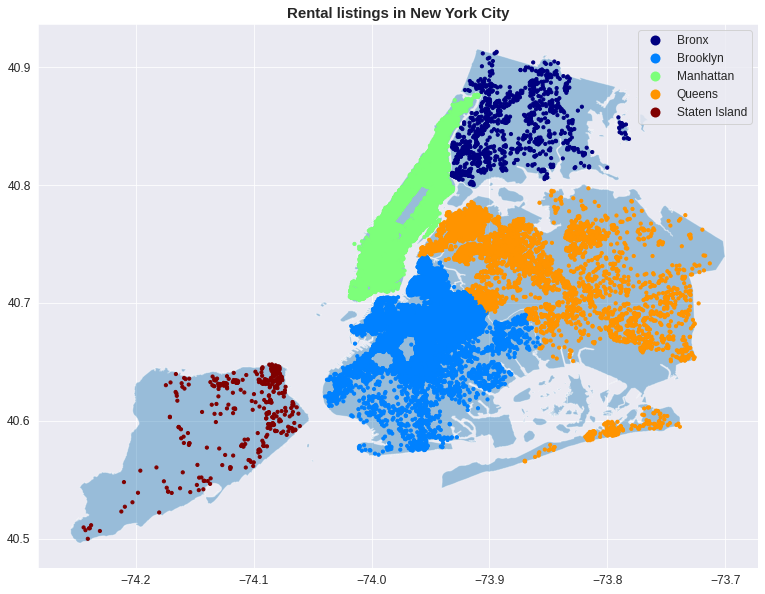

In [ ]:
import geopandas as gpd
from shapely.geometry import Point, Polygon


gdp_path_r ="/content/drive/MyDrive/EDA - Capstone Project/Borough Boundaries/geo_export_0c550535-4d21-4555-aa94-73550209bb00.shp"
gdp_path_n = "/content/drive/MyDrive/DATA_FILES/geopandas_file+/geo_export_0c550535-4d21-4555-aa94-73550209bb00.shp"

# loading the New York city map
street_map = gpd.read_file(gdp_path_r)

# Zip x and y coordinates
geometry = [Point(xy) for xy in zip(airbnb_df["longitude"], airbnb_df["latitude"])]

# Creating Geopandas dataframe
geo_df = gpd.GeoDataFrame(airbnb_df, geometry = geometry)

# Creating figure and axes, assign to subplot
fig, ax = plt.subplots(figsize = (15, 10))

# Add .shp mapfile to axes
street_map.plot(ax = ax, alpha = 0.4)
geo_df.plot(column = "neighbourhood_group", ax = ax, legend = True, markersize = 10, cmap = "jet")

# Adding title to graph
plt.title("Rental listings in New York City", fontsize = 15, fontweight = "bold")

plt.show()



> **From the map, we can see that there are listings from most parts of Manhattan followed by Brooklyn.**


> **Staten Island has the least number of listings.**




**Now Let's try to find the exact count of listings present in each neighbourhood group.**

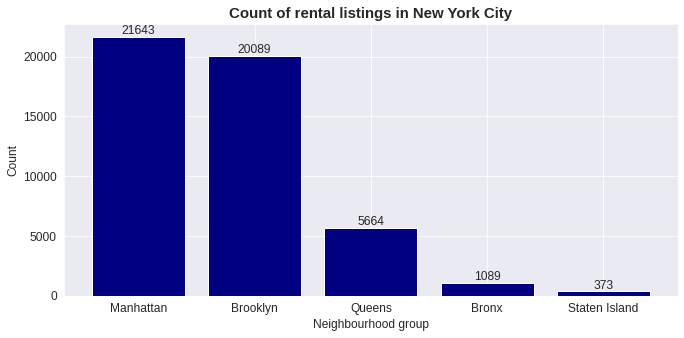

In [ ]:
# Number of listings present in each neighbourhood_group

num_lst = airbnb_df["neighbourhood_group"].value_counts()
num_lst_barplot = plt.bar(x = num_lst.index, height = num_lst.values, color = "navy")
plt.bar_label(num_lst_barplot)
plt.xlabel("Neighbourhood group")
plt.ylabel("Count")
plt.title("Count of rental listings in New York City", fontsize = 15, fontweight = "bold")

plt.show()



---



> **Now it's quite clear AIRBNB has a widespread business across Manhattan and Brooklyn as the most number of listings in the New York City area from here.**



**Most listings are from Manhattan followed by Brooklyn but what about the prices of these listings? Are these listings prices cheap or costlier as compared to other locations? Let's dig it out.**

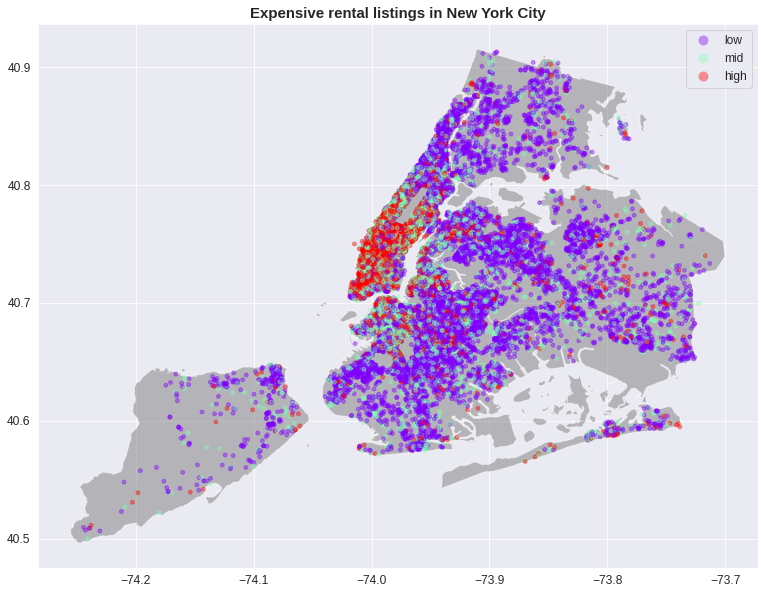

In [ ]:
fig, ax = plt.subplots(figsize = (15, 10))
street_map.plot(ax = ax, alpha = 0.5, color = "grey")
geo_df.plot(column = "price_category", alpha = 0.4, ax = ax, legend = True, markersize = 15, cmap = "rainbow")
plt.title("Expensive rental listings in New York City", fontsize = 15, fontweight = "bold")
plt.show()

> **Its clearly visible, Manhattan has the expensive listings. It means that Manhattan is the most profitable location both for the AIRBNB and its hosts.**



**But what makes Manhattan such an expensive location of New York City? The answer lies in the fact that Manhattan is the cultural, administrative, financial center of New York City and is headquarter of major MNCs and important universities. It's also the home to the world's two largest stock exchanges by total market capitalization: the New York Stock Exchange and NASDAQ which raises the bar of cost of living in Manhattan.**

**Before moving forward Let's check out the median price of listings in each neighourhood_group.**

In [ ]:
group_price = airbnb_df.groupby("neighbourhood_group")
group_price["price"].median().to_frame()

,price
neighbourhood_group,
Bronx,65
Brooklyn,90
Manhattan,150
Queens,75
Staten Island,75




> **The median price of a listing in Manhattan is $150 and there is a huge gap in the median price of Manhattan as compared to other neighbourhood groups.**



**Let move forward and gain insights from other feature variables. Lets talk about the types of rooms provided by AIRBNB hosts in New York City.**

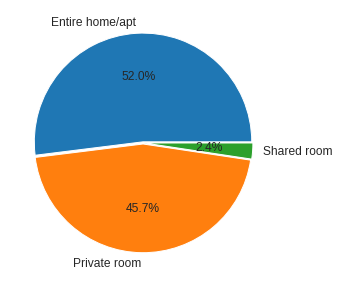

In [ ]:
# Type of room space airbnb host provides

plt.pie(airbnb_df['room_type'].value_counts(), labels = ['Entire home/apt', 'Private room', 'Shared room'], autopct='%1.1f%%', explode = [0.01, 0.01, 0.01])

plt.show()

> **Most of the AIRBNB hosts present in New York City rents there Entire home/apartment and Private room.**

> **Shared rooms are rarely rented by hosts.**







**Now Let's try to visualize with the help of a bar plot which type of room is mostly listed in each neighbourhood group.**

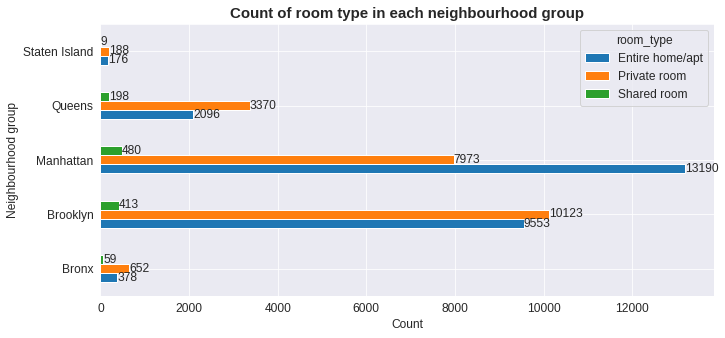

In [ ]:
# Type of room space airbnb host provides in each borough

group_room_crosstab =  pd.crosstab(index = airbnb_df["neighbourhood_group"], columns = airbnb_df["room_type"])
group_room_crosstab_plt = group_room_crosstab.plot(kind = "barh")

for container in group_room_crosstab_plt.containers:
  group_room_crosstab_plt.bar_label(container)

plt.xlabel("Count")
plt.ylabel("Neighbourhood group")
plt.title("Count of room type in each neighbourhood group", fontsize = 15, fontweight = "bold")

plt.show()

> **It seems like half the listings renting out Entire houses and apartments are from Manhattan only.**


> **Private rooms are mostly rented out in all neighbourhood group except in Manhattan.**

**Now the question arises what is the price of different room types in different neighbourhood group? Let's find it out by calculating the median price for every room type in a different neighbourhood group.**

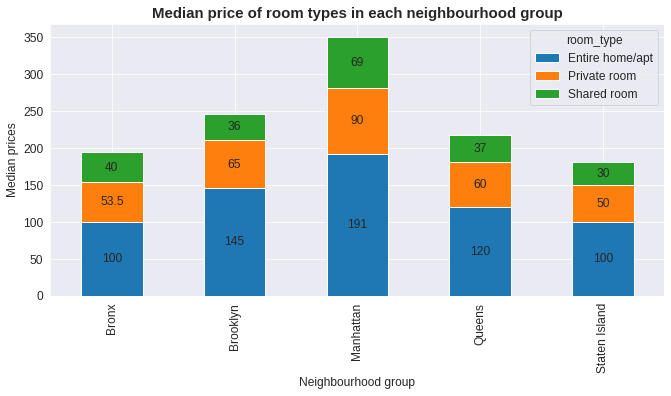

In [ ]:
# Median price of room in every borough for each room type

group_room_pivot = pd.pivot_table(data = airbnb_df, values = "price",index = "neighbourhood_group", columns = "room_type", aggfunc = np.median)
group_room_plot = group_room_pivot.plot(kind = "bar", stacked = True)

for container in group_room_plot.containers:
  group_room_plot.bar_label(container, label_type = "center")

plt.xlabel("Neighbourhood group")
plt.ylabel("Median prices")
plt.title("Median price of room types in each neighbourhood group", fontsize = 15, fontweight = "bold")

plt.show()

> **Entire houses and apartments are expensive in every neighbourhood group.**

> **Brooklyn and Queens have similar price ranges for Private and Shared rooms**

> **The Bronx and Staten Island have a similar type of price range for each room type.**





**Now Let's move forward and extract information about most reviewed hosts.**

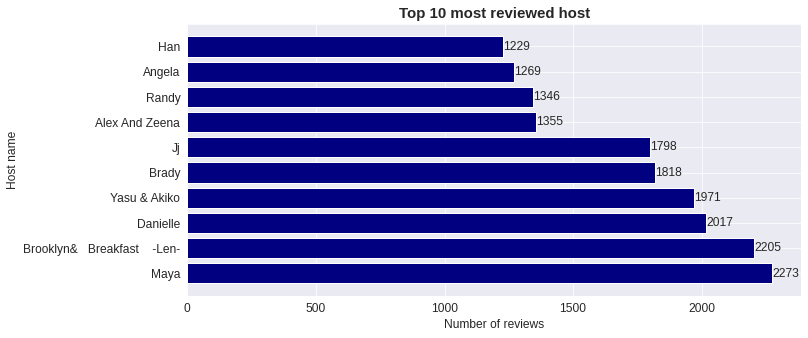

In [ ]:
# 10 most reviewed host

most_reviewed_host = airbnb_df.groupby(['host_id', "host_name", "neighbourhood"])['number_of_reviews'].sum().sort_values(ascending=False).reset_index().head(10)
bar = plt.barh(width = "number_of_reviews", y = "host_name", data = most_reviewed_host, color = "navy")
plt.bar_label(bar, label_type = "edge")

plt.xlabel("Number of reviews")
plt.ylabel("Host name")
plt.title("Top 10 most reviewed host", fontsize = 15, fontweight = "bold")

plt.show()



> **Maya is the most reviewed host with 2273 reviews.**



**We don't have sufficient information to know whether these are positive or negative reviews, we can consider these host as popular.Now we will calculate the average price at which these popular host rent their properties to their guests.**

In [ ]:
#Avg price of listings of most reviewed host

top10_list = most_reviewed_host.host_name.to_list() 
top_host_dict = {}
for elem in  top10_list:
  avg_price=airbnb_df[airbnb_df['host_name']==elem].price.median()
  top_host_dict[elem]=avg_price

avg_price_df=pd.DataFrame(top_host_dict.items(), columns=['Host_name', 'avg_price'])
avg_price_df.set_index('Host_name', inplace=True)
# avg_price_plt = avg_price_df.sort_values(by = "avg_price",ascending=False).reset_index().plot(x = "Host_name",y = "avg_price",kind = "barh", color = "navy")
# annot(avg_price_plt)

# plt.xlabel("Median price")
# plt.ylabel("Host_name")
# plt.title("Average price of top 10 most reviewed host", fontsize = 15, fontweight = "bold")

# plt.show()

> **Among the most reviewed host, Yasu & Akiko has the most expensive listings.**



**We can also calculate the most reviewed neighbourhood of New York City.**



NameError: ignored

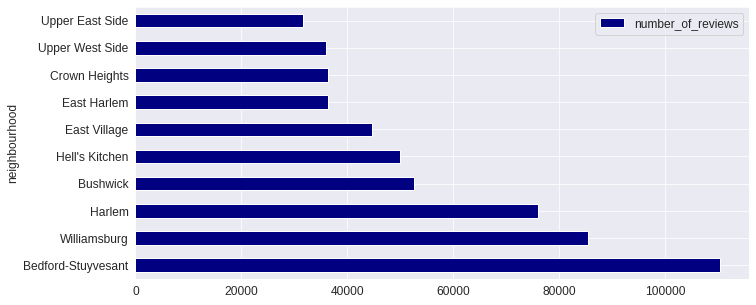

In [ ]:
# Most reviewed neighbourhood

busiest_host = airbnb_df.groupby(["neighbourhood"])['number_of_reviews'].sum().sort_values(ascending = False).reset_index().head(10)
busiest_host_plt = busiest_host.plot(x = "neighbourhood",y = "number_of_reviews",kind = "barh", color = "navy")
annot(busiest_host_plt)

plt.xlabel("Number of reviews")
plt.ylabel("Neighbourhood")
plt.title("Top 10 most reviewed neighbourhood", fontsize = 15, fontweight = "bold")

plt.show()




> **Bedford-Stuyvesant is the most reviewed neighbouhood followed by Williamsburg.**



**We will also calculate the most expensive neighbourhood of New York City.**

In [ ]:
# Expensive Neighbourhood

expn_neigbhd = airbnb_df.groupby(["neighbourhood"])['price'].median().sort_values(ascending = False).reset_index().head(10)
expn_neigbhd_plt = expn_neigbhd.plot(x = "neighbourhood",y = "price",kind = "barh", color = "navy")
annot(expn_neigbhd_plt)

plt.xlabel("Median price")
plt.ylabel("Neighbourhood")
plt.title("Most expensive neighbourhood of New York City", fontsize = 15, fontweight = "bold")

plt.show()



> **Fort Wadsworth is most expensive neighbourhood in the New York City.**



**Now we will be moving to the availability of the listings. We will now visualize the availability of listings in different neighbourhood groups.**

In [ ]:
sns.boxplot(x = "neighbourhood_group", y = "availability_365", data = airbnb_df)
plt.title("Availability of listings in each neighbourhood", fontsize = 15, fontweight = "bold")

plt.show()



> **Most bookings are opened in Staten Island followed by the Bronx.**


> **Only a few bookings are opened in Brooklyn and Manhattan.**





**Finally, let's draw a correlation matrix to check whether there is any correlation between variables**

In [ ]:
col_to_check = ['price','minimum_nights', 'number_of_reviews', 'reviews_per_month','calculated_host_listings_count', 'availability_365']
corr = airbnb_df[col_to_check].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation between variables",  fontsize = 15, fontweight = "bold")

plt.show()



> **There is a correlation between "number_of_reviews" and "reviews_per_month".**



# **Inferences and Conclusions**

**We have drawn many interesting inferences from the dataset, here's a summary 
of few of them:**


> ****


